In [1]:
from random import randint
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from scipy import (              
    misc, stats, ndimage)
from scipy.stats import linregress
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (
    pairwise_tukeyhsd, MultiComparison)

* students: The number of students.
* teachers: The number of teachers.
* lunch: The proportion of students who were eligible for a subsidized lunch (in %).
* expenditure: The school expenditure per student.
* english: The proportion of students who speak English as a second language (in %).
* read: The test score in reading.
* math: The test score in mathematics.

In [2]:
df = pd.read_csv("CASchools.csv")
df.head()

,students,teachers,lunch,expenditure,english,read,math
0,195,10.900000,2.040800,6384.911133,0.000000,691.599976,690.000000
1,240,11.150000,47.916698,5099.380859,4.583333,660.500000,661.900024
2,1550,82.900002,76.322601,5501.954590,30.000002,636.299988,650.900024
3,243,14.000000,77.049202,7101.831055,0.000000,651.900024,643.500000
4,1335,71.500000,78.427002,5235.987793,13.857677,641.799988,639.900024


Investigate the relationship between **the average test score of students** and **the student-teacher ratio including also control variables**

> Add two new variables to the data set for each school providing the average of the two test scores (average = (read + math)/2) and the student-teacher ratio (ratio = students/teachers), respectively.

In [3]:
df['average'] = (df['read'] + df['math'])/2
df['ratio'] = df['students']/df['teachers']
df

,students,teachers,lunch,expenditure,english,read,math,average,ratio
0,195,10.900000,2.040800,6384.911133,0.000000,691.599976,690.000000,690.799988,17.889909
1,240,11.150000,47.916698,5099.380859,4.583333,660.500000,661.900024,661.200012,21.524664
2,1550,82.900002,76.322601,5501.954590,30.000002,636.299988,650.900024,643.600006,18.697225
3,243,14.000000,77.049202,7101.831055,0.000000,651.900024,643.500000,647.700012,17.357143
4,1335,71.500000,78.427002,5235.987793,13.857677,641.799988,639.900024,640.850006,18.671329
...,...,...,...,...,...,...,...,...,...
415,984,59.730000,3.556900,7290.338867,5.995935,700.900024,707.700012,704.300018,16.474134
416,3724,208.479996,1.503800,5741.462891,4.726101,704.000000,709.500000,706.750000,17.862625
417,441,20.150000,37.193802,4402.831543,24.263039,648.299988,641.700012,645.000000,21.885856
418,101,5.000000,59.405899,4776.336426,2.970297,667.900024,676.500000,672.200012,20.200000


In [4]:
df.describe()

,students,teachers,lunch,expenditure,english,read,math,average,ratio
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2628.792857,129.067376,44.705237,5312.407541,15.768155,654.970477,653.342619,654.156548,19.640425
std,3913.104985,187.912679,27.123381,633.937053,18.285927,20.107980,18.754202,19.053347,1.891812
min,81.000000,4.850000,0.000000,3926.069580,0.000000,604.500000,605.400024,605.550018,14.000000
25%,379.000000,19.662499,23.282200,4906.180054,1.940807,640.400024,639.375015,640.050003,18.582360
50%,950.500000,48.564999,41.750700,5214.516602,8.777634,655.750000,652.449982,654.449997,19.723209
75%,3008.000000,146.350002,66.864725,5601.401367,22.970003,668.725006,665.849991,666.662491,20.871814
max,27176.000000,1429.000000,100.000000,7711.506836,85.539719,704.000000,709.500000,706.750000,25.800000


> What is the relationship between the average test score (average) and the student-teacher ratio (ratio)?

In [5]:
corr, p = stats.pearsonr(df['average'], df['ratio'])
print(corr)

-0.22636274550325666


In [6]:
linregress(df['average'], df['ratio'])

LinregressResult(slope=-0.02247561610536251, intercept=34.34299675693279, rvalue=-0.22636274550325666, pvalue=2.7833081344391656e-06, stderr=0.004730387015660692, intercept_stderr=3.095722822887744)

In [7]:
model = smf.ols("ratio ~ average", data=df)
m = model.fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           2.78e-06
Time:                        08:03:02   Log-Likelihood:                -852.17
No. Observations:                 420   AIC:                             1708.
Df Residuals:                     418   BIC:                             1716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.3430      3.096     11.094      0.0

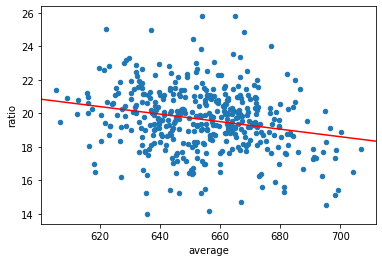

In [8]:
fig = df.plot.scatter(x="average", y="ratio");
sm.graphics.abline_plot(model_results=m, ax=fig.axes, c="red");
plt.show()

* low p-value (< 0.05) indicates that we can reject the null hypothesis. In other words, a predictor (average) has a low p-value and is likely to be a meaningful addition to the model because changes in the predictor's value are related to changes in the response variable.
* (corr < 0) -> regression slope (b) will be negative
* The high F-value shows us that we can reject the null hypothesis <br>
Conclusion: the predictor's (average) value are related to changes in the response (ratio) variable. So we reject the Null hypothesis (that there is no relationships between these two variables)

> Compute a linear regression with the average test score as the dependent variable and ratio as one of the explanatory variables. But also include lunch, expenditure, and english as further explanatory “control” variables.


In [9]:
X = df[['ratio','lunch', 'expenditure', 'english']] 
Y = df['average']

In [10]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 665.9881983003888
Coefficients: 
 [-0.23538819 -0.54639275  0.00362205 -0.12834171]


In [11]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
mod = smf.ols(formula='average ~ ratio + english + expenditure + lunch', data=df)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     375.3
Date:                Thu, 13 Jan 2022   Prob (F-statistic):          2.25e-136
Time:                        08:03:03   Log-Likelihood:                -1512.0
No. Observations:                 420   AIC:                             3034.
Df Residuals:                     415   BIC:                             3054.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     665.9882      9.460     70.398      

We saw that ratio and average are significantly correlated (higher in the notebook) and then we now see that ***ratio*** is not significant at all anymore if we include "confounder" (english + expenditure + lunch) variables that have an effect on both average and ratio. Such variables will have a more direct influence decreasing the ratio but increasing average. <br>
We can assume that when all variables are together it influences at our coefficients, but not all coefficients then influence the independant _variable_.

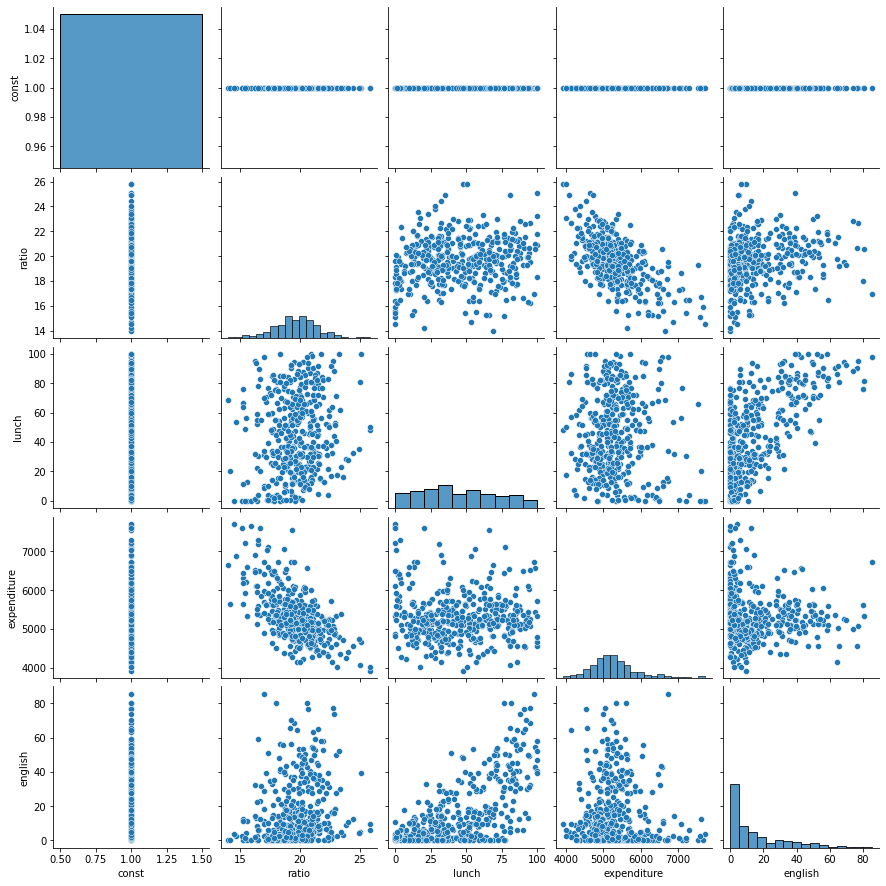

In [12]:
sns.pairplot(X)

We can see intersting dependencies 
* that if school have a lot of childern with second english language the proportion of students who were eligible for a subsidized lunche also increase
* also if school spends more money per student, then ratio of studennts/teachers decrease because school can afford to hire more teachers

> Which explanatory variables yield a statistically significant linear relationship with the average test score (at 5% level)?
(Specifically: Write down the null and alternative hypothesis for each of the t-tests of the coefficients.)

1. Hypotheses 1: 
* Is there effect on average due to the student-teacher ratio? <br>
H0: b(ratio) = 0 There is no effect on average due to the student-teacher ratio<br>
H1: b(ratio) != 0 There is some no effect on average due to the student-teacher ratio <br>
**Do not reject Null hypothesis** <br>
2. Hypotheses 2: 
* Is there effect on average due to the proportion of students who speak English as a second language? <br>
H0: b(english) = 0 There is no effect on average due to the proportion of students who speak English as a second language <br>
H1: b(english) != 0 There is some effect on average due to the proportion of students who speak English as a second language <br>
**Reject Null hypothesis** <br>
3. Hypotheses 3: 
* Is there effect on average due to the school expenditure per student?<br>
H0: b(expenditure) = 0 There is no effect on average due to the school expenditure per student<br>
H1: b(expenditure) != 0 There is some effect on average due to the school expenditure per student <br>
**Reject Null hypothesis** <br>
4. Hypotheses 4: 
* Is there effect on average due to the proportion of students who were eligible for a subsidized lunch? <br>
H0: b(lunch) = 0 There is no effect on average due to the proportion of students who were eligible for a subsidized lunch <br>
H1: b(lunch) != 0 There is some effect on average due to the proportion of students who were eligible for a subsidized lunch <br>
**Reject Null hypothesis**
5. Hypotheses 5: 
* Is intercept equal to zero? <br>
H0: intercept = 0  <br>
H1: intercept != 0  <br>
**Reject Null hypothesis**